In [1]:
import kagglehub
import pandas as pd
import os

# Step 1: Download the dataset
dataset_path = kagglehub.dataset_download("paultimothymooney/recipenlg")

# Step 2: Check what files were downloaded
print("Dataset downloaded to:", dataset_path)
print("Files inside:", os.listdir(dataset_path))

# Step 3: Find the correct file (adjust if different)
file_path = os.path.join(dataset_path, "RecipeNLG_dataset.csv")

# Step 4: Load it with pandas directly (✅)
df = pd.read_csv(file_path)

# Step 5: Preview
print("First 5 records:")
print(df.head())


Dataset downloaded to: C:\Users\Hp\.cache\kagglehub\datasets\paultimothymooney\recipenlg\versions\1
Files inside: ['RecipeNLG_code', 'RecipeNLG_dataset.csv', 'RecipeNLG_license.png', 'RecipeNLG_paper.pdf']
First 5 records:
   Unnamed: 0                  title  \
0           0    No-Bake Nut Cookies   
1           1  Jewell Ball'S Chicken   
2           2            Creamy Corn   
3           3          Chicken Funny   
4           4   Reeses Cups(Candy)     

                                         ingredients  \
0  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  ["1 small jar chipped beef, cut up", "4 boned ...   
2  ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...   
3  ["1 large whole chicken", "2 (10 1/2 oz.) cans...   
4  ["1 c. peanut butter", "3/4 c. graham cracker ...   

                                          directions  \
0  ["In a heavy 2-quart saucepan, mix brown sugar...   
1  ["Place chipped beef on bottom of baking dish....   
2  ["In a slow cooker, combine 

In [2]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head(5)

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [4]:
df.shape

(2231142, 7)

In [5]:
df.describe()

,Unnamed: 0
count,2.231142e+06
mean,1.115570e+06
std,6.440754e+05
min,0.000000e+00
25%,5.577852e+05
50%,1.115570e+06
75%,1.673356e+06
max,2.231141e+06


In [6]:
# Info and missing values
df.info()
df.isnull().sum()

# Descriptive summary for text lengths
df['ingredients_len'] = df['ingredients'].apply(lambda x: len(str(x).split()))
df['directions_len'] = df['directions'].apply(lambda x: len(str(x).split()))

df[['ingredients_len', 'directions_len']].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231142 entries, 0 to 2231141
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   title        object
 2   ingredients  object
 3   directions   object
 4   link         object
 5   source       object
 6   NER          object
dtypes: int64(1), object(6)
memory usage: 119.2+ MB


,ingredients_len,directions_len
count,2.231142e+06,2.231142e+06
mean,4.137092e+01,8.591087e+01
std,2.218255e+01,8.029257e+01
min,1.000000e+00,1.000000e+00
25%,2.600000e+01,3.600000e+01
50%,3.700000e+01,6.100000e+01
75%,5.100000e+01,1.090000e+02
max,1.891000e+03,2.649000e+03


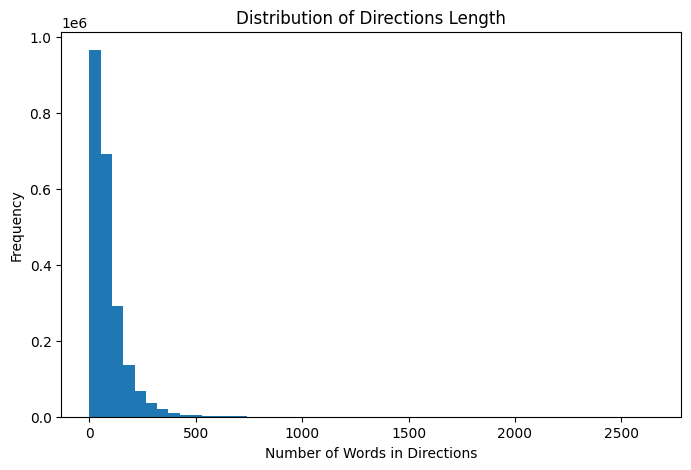

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['directions_len'], bins=50)
plt.title("Distribution of Directions Length")
plt.xlabel("Number of Words in Directions")
plt.ylabel("Frequency")
plt.show()


In [8]:
df.isnull().sum()

Unnamed: 0         0
title              1
ingredients        0
directions         0
link               0
source             0
NER                0
ingredients_len    0
directions_len     0
dtype: int64

In [9]:
df.dropna(inplace=True)


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


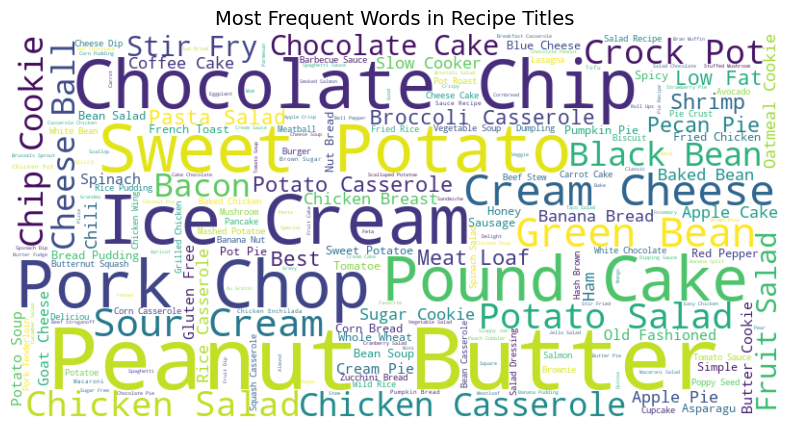

In [10]:
%pip install wordcloud
from wordcloud import WordCloud

text = ' '.join(df['title'].astype(str).tolist())

wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Recipe Titles", fontsize=14)
plt.show()


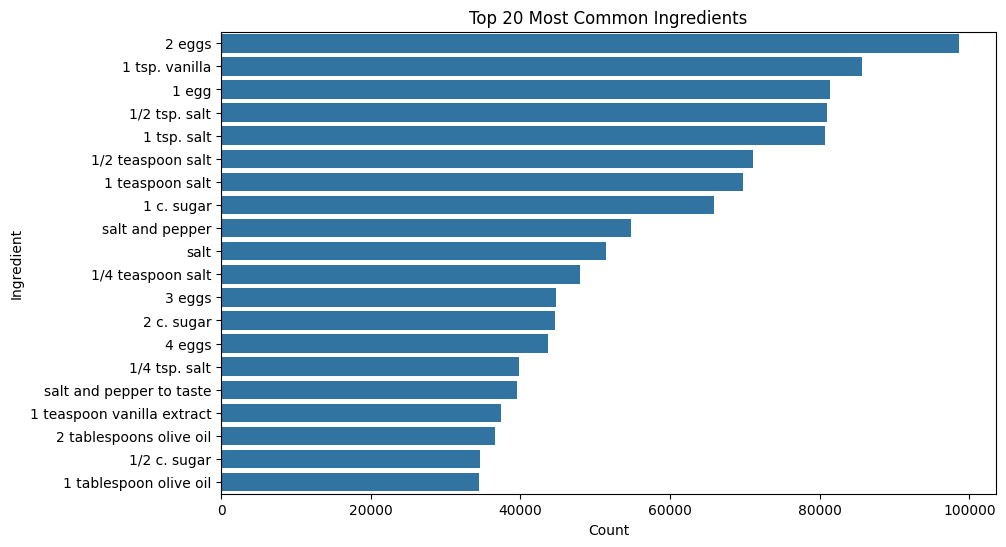

In [11]:
from collections import Counter
import ast

# Convert string list to Python list
def parse_ingredients(ing):
    try:
        return ast.literal_eval(ing)
    except:
        return []

# Flatten all ingredients
ingredients = []
for ing_list in df['ingredients'].apply(parse_ingredients):
    ingredients.extend([i.lower().strip() for i in ing_list])

# Count most common ones
common_ing = Counter(ingredients).most_common(20)

# Plot
names, counts = zip(*common_ing)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(names))
plt.title("Top 20 Most Common Ingredients")
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.show()


In [12]:
word = "fufu"

# Case-insensitive search
matches = df[df['title'].str.contains(rf'\b{word}\b', case=False, na=False)]

print(f"Found {len(matches)} rows containing '{word}'.")
print(matches.head())

Found 14 rows containing 'fufu'.
         Unnamed: 0 title                                        ingredients  \
296528       296528  Fufu         ["4 Tbsp. flour (plantain)", "1 c. water"]   
933719       933719  Fufu  ["4 yucca (cassava) roots, peeled and sliced",...   
988142       988142  Fufu  ["1 lb white potato, skinned", "1 lb orange sw...   
1040767     1040767  Fufu  ["3 lbs yams (or malanga or cocoyam or green p...   
1041396     1041396  Fufu  ["2 1/2 cups Bisquick", "2 1/2 cups instant po...   

                                                directions  \
296528   ["Mix the flour with water and make a smooth p...   
933719   ["Place the cassava and plantains (with peels ...   
988142   ["Cube and boil the potatoes until done (they'...   
1040767  ["Peel the yam and malanga. Remove the peel fr...   
1041396  ["Bring 6 cups of water to a rapid boil in a l...   

                                                    link    source  \
296528   www.cookbooks.com/Recipe-Details.a

In [13]:
word = "Chapati"

# Case-insensitive search
matches = df[df['title'].str.contains(rf'\b{word}\b', case=False, na=False)]

print(f"Found {len(matches)} rows containing '{word}'.")
print(matches.head())

Found 54 rows containing 'Chapati'.
        Unnamed: 0                          title  \
83570        83570                        Chapati   
208127      208127  Chapati(Indian Wheat Bread)     
292858      292858       Cabbage Dish And Chapati   
907851      907851   Chapati (East African Bread)   
930405      930405           Potato Chapati Bread   

                                              ingredients  \
83570   ["1 c. all-purpose flour", "1/2 c. water", "1/...   
208127  ["1 pkg. active dry yeast", "3/4 c. warm water...   
292858  ["1/2 cabbage", "1 Tbsp. oil", "1 chopped onio...   
907851  ["2 cups all-purpose flour, sifted", "1 teaspo...   
930405  ["1 cup mashed potatoes", "salt to taste", "1/...   

                                               directions  \
83570   ["Knead the dough as you would pizza dough, on...   
208127  ["Dissolve yeast in warm water and let stand 5...   
292858  ["Saute cabbage in oil.", "Add a pinch of salt...   
907851  ["Mix 2 cups flour and sal

In [14]:
word = "ugali"

# Case-insensitive search
matches = df[df['title'].str.contains(rf'\b{word}\b', case=False, na=False)]

print(f"Found {len(matches)} rows containing '{word}'.")
print(matches.head())

Found 4 rows containing 'ugali'.
         Unnamed: 0                         title  \
651669       651669                 African Ugali   
875613       875613                         Ugali   
1076924     1076924                         Ugali   
1125396     1125396  Pap Or Sadza Or Ugali Or ...   

                                               ingredients  \
651669   ["1 c. water", "1 tsp. salt", "1 c. milk", "1 ...   
875613                          ["maize", "boiling water"]   
1076924  ["4 cups finely ground cornmeal (If you can fi...   
1125396  ["4 1/2 cups water", "1 teaspoon salt", "2 cup...   

                                                directions  \
651669   ["Bring water and salt to a boil.", "In a bowl...   
875613   ["Ugali is maize meal or corn meal poured into...   
1076924  ["Heat water to boiling in a saucepan. Slowly ...   
1125396  ["Bring water and salt to a boil in a large po...   

                                                      link    source  \
651669 

In [15]:
import pandas as pd

# Drop the unwanted unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Check what columns remain
print(df.columns)
print(df.head(2))


Index(['title', 'ingredients', 'directions', 'link', 'source', 'NER',
       'ingredients_len', 'directions_len'],
      dtype='object')
                   title                                        ingredients  \
0    No-Bake Nut Cookies  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  Jewell Ball'S Chicken  ["1 small jar chipped beef, cut up", "4 boned ...   

                                          directions  \
0  ["In a heavy 2-quart saucepan, mix brown sugar...   
1  ["Place chipped beef on bottom of baking dish....   

                                              link    source  \
0   www.cookbooks.com/Recipe-Details.aspx?id=44874  Gathered   
1  www.cookbooks.com/Recipe-Details.aspx?id=699419  Gathered   

                                                 NER  ingredients_len  \
0  ["brown sugar", "milk", "vanilla", "nuts", "bu...               31   
1  ["beef", "chicken breasts", "cream of mushroom...               21   

   directions_len  
0              60  
1  

In [16]:
import ast

# Drop rows missing important fields
df = df.dropna(subset=['title', 'directions',"ingredients_len", "directions_len"])

# Convert directions column from stringified list to plain text
def parse_list(x):
    try:
        return " ".join(ast.literal_eval(x)) if isinstance(x, str) and x.startswith("[") else x
    except Exception:
        return str(x)

df['directions'] = df['directions'].apply(parse_list)

# Build Q&A pairs
qa_data = []
for _, row in df.iterrows():
    question = f"How do I make {row['title']}?"
    answer = row['directions']
    qa_data.append({"question": question, "answer": answer})

qa_df = pd.DataFrame(qa_data)
print(qa_df.head())


                               question  \
0    How do I make No-Bake Nut Cookies?   
1  How do I make Jewell Ball'S Chicken?   
2            How do I make Creamy Corn?   
3          How do I make Chicken Funny?   
4   How do I make Reeses Cups(Candy)  ?   

                                              answer  
0  In a heavy 2-quart saucepan, mix brown sugar, ...  
1  Place chipped beef on bottom of baking dish. P...  
2  In a slow cooker, combine all ingredients. Cov...  
3  Boil and debone chicken. Put bite size pieces ...  
4  Combine first four ingredients and press in 13...  


## Subsetting the Datset because it abput 2M and it needs a large computing power for it

In [17]:

random_keywords = [
    # African cuisines
    "african", "ghana", "ghanaian", "nigeria", "nigerian", "kenya", "kenyan",
    "ethiopia", "ethiopian", "uganda", "ugandan", "tanzania", "tanzanian",
    "south africa", "south african", "zambia", "zambian", "zimbabwe", "cameroon",
    "rwanda", "rwandan", "congo", "congolese", "sudan", "burundi", "senegal",
    "senegalese", "morocco", "moroccan", "egyptian", "ivory coast", "cote d’ivoire",
    
    # African dishes
    "jollof", "fufu", "banku", "kenkey", "waakye", "koki", "ndolé", "ugali", 
    "nsima", "sadza", "nyama", "bobotie", "sukuma", "okro", "okra", "groundnut", 
    "piri piri", "tilapia", "kebab", "chapati", "plantain", "bean stew", "egusi",
    
    # Breakfast, dessert, and drink items
    "tea", "milk", "porridge", "cereal",
    
    # Common African staples
    "beans", "yam", "cassava", "plantain", "maize", "cocoyam", 
    "fried rice", "rice balls"
]

# Keywords to EXCLUDE
exclude_keywords = [
    "steak", "pork", "beef", "bacon", "ham", "sausage", "lamb", "turkey",
    "shrimp", "lobster", "crab", "tuna", "salmon", "wine", "burger", 
    "cheese", "steakhouse", "barbecue"
]

def contains_keywords(text):
    if not isinstance(text, str):
        return False
    text = text.lower()
    return any(k in text for k in random_keywords)

def exclude_unwanted(text):
    if not isinstance(text, str):
        return False
    text = text.lower()
    return any(k in text for k in exclude_keywords)

# Filter: keep only relevant + remove unwanted
mask = qa_df['question'].apply(contains_keywords) & ~qa_df['question'].apply(exclude_unwanted)

filtered_df = qa_df[mask]
print(f"Filtered data size after exclusions: {len(filtered_df)} rows")

# Preview some results
print(filtered_df.sample(5)[['question', 'answer']])


Filtered data size after exclusions: 62523 rows
                                                 question  \
220989                          How do I make Fried Rice?   
929531  How do I make Tykvenitsa Millet Breakfast Cereal?   
365164                 How do I make Buttermilk Dressing?   
549873                        How do I make Cereal Candy?   
376645                         How do I make Ranch Beans?   

                                                   answer  
220989  Melt margarine in frying pan. Add rice; cook u...  
929531  Place pumpkin, water, rice milk, and millet in...  
365164  Shake all ingredients in tightly covered conta...  
549873  Mix the Cornflakes, Rice Krispies, coconut and...  
376645  Brown meat and the rest of the ingredients in ...  


In [18]:
filtered_df.duplicated().sum()
filtered_df = filtered_df.drop_duplicates()
filtered_df.shape

(62344, 2)

In [19]:
# Drop duplicate questions but keep all other columns
filtered_df = filtered_df.drop_duplicates(subset='question', keep='first')

# Check shape
print(filtered_df.shape)

# Preview
print(filtered_df.head(5))


(40728, 2)
                                            question  \
19   How do I make Eggless Milkless Applesauce Cake?   
95                        How do I make Baked Beans?   
105               How do I make Microwave Spice Tea?   
128                How do I make Bright Party Beans?   
166                How do I make Creole Green Beans?   

                                                answer  
19   Mix Crisco with applesauce, nuts and raisins. ...  
95   Cook onions and bell pepper in oil until onion...  
105  Mix all ingredients together and store in airt...  
128  Fry ground beef and dry onions. Add salt and p...  
166  Saute green pepper and onion in hot bacon drip...  


In [20]:
filtered_df

,question,answer
19,How do I make Eggless Milkless Applesauce Cake?,"Mix Crisco with applesauce, nuts and raisins. ..."
95,How do I make Baked Beans?,Cook onions and bell pepper in oil until onion...
105,How do I make Microwave Spice Tea?,Mix all ingredients together and store in airt...
128,How do I make Bright Party Beans?,Fry ground beef and dry onions. Add salt and p...
166,How do I make Creole Green Beans?,Saute green pepper and onion in hot bacon drip...
...,...,...
2230700,How do I make moroccan chicken kabob tapas Rec...,Cut chicken into 1 inch cubes. Put in all rema...
2230776,How do I make Caramelized Okra and Corn with C...,"Preheat oven to 425F. Toss together okra, corn..."
2231042,How do I make Steamer Clam Chowder?,1. Fill two large pots (or two sinks) with col...
2231045,How do I make Milk Chocolate Crepe Terrine Rec...,"To make the batter, beat the eggs well, then a..."


In [21]:
from collections import Counter
import re

words = " ".join(filtered_df['question'].astype(str).tolist()).lower()
word_counts = Counter(re.findall(r'\b[a-z]+\b', words))
print(word_counts.most_common(30))


[('make', 40798), ('i', 40795), ('how', 40793), ('do', 40735), ('beans', 12609), ('with', 8298), ('and', 8048), ('tea', 5719), ('green', 4061), ('milk', 3807), ('buttermilk', 3699), ('rice', 3298), ('s', 3225), ('chicken', 2434), ('baked', 2314), ('recipe', 2274), ('steamed', 2239), ('fried', 2062), ('moroccan', 1482), ('black', 1415), ('cake', 1299), ('tilapia', 1264), ('chocolate', 1188), ('in', 1076), ('sweet', 1072), ('salad', 1069), ('okra', 1042), ('sauce', 1007), ('style', 1002), ('cereal', 980)]


In [22]:
main_data = filtered_df.sample(n=min(20000, len(filtered_df)), random_state=30)
main_data.reset_index(drop=True, inplace=True)

print("Subset size:", len(main_data))
main_data.head(10)


Subset size: 20000


,question,answer
0,How do I make Low-Carb Hot Morning Cereal ?,1 1/2 cups almond flour 1/4 cup flax seed meal...
1,How do I make Sunday Afternoon Tea Quick Pickl...,Use a fork to run through the surface of the c...
2,How do I make Candied Yams 2 Recipe?,Put everything in a pot. Stir. Cover and cook ...
3,How do I make Portuguese-Style Steamed Mussels?,In a large (6 quart) casserole or soup pot ove...
4,How do I make R.'S Buttermilk Biscuits Recipe?,"Place flour in large bowl, making a well in fl..."
5,How do I make Milky Broccoli Soup?,Melt the first amount of butter in a medium si...
6,How do I make Spicy Black Beans And Peppers?,Heat oil in heavy large skillet over medium-hi...
7,How do I make Tagine(Moroccan Chicken) ?,Start lemons boiling in brine (salt water). Mi...
8,How do I make Green Bean Stew In Crock-Pot?,Layer round steak at bottom of crock-pot and s...
9,How do I make Island Red Beans?,Heat oil in a large saucepan or Dutch oven ove...


In [23]:
word = "rice"

# Case-insensitive search
matches = main_data[main_data['question'].str.contains(rf'\b{word}\b', case=False, na=False)]

print(f"Found {len(matches)} rows containing '{word}'.")
print(matches.head(40))

Found 1598 rows containing 'rice'.
                                              question  \
10             How do I make Texas Red Beans and Rice?   
13                   How do I make Rice and Red Beans?   
24        How do I make Super Easy Chinese Fried Rice?   
33   How do I make Chinese Chicken and Rice Porridg...   
38   How do I make Brown Rice With Salsa And Black ...   
42        How do I make Chinese Roast Duck Fried Rice?   
46        How do I make Korean Fried Rice (Bokeumbap)?   
56                          How do I make Fried Rice ?   
64                    How do I make Takana Fried Rice?   
66           How do I make Jollof Rice(West Africa)  ?   
92   How do I make Chicken Mole With Cilantro Lime ...   
93   How do I make Fried Rice from Every Day With R...   
102             How do I make Easy Chicken Fried Rice?   
114            How do I make Vegan Red Beans And Rice?   
118                      How do I make Green-Tea Rice?   
123     How do I make Thai Basil Frie

In [24]:
main_data.to_csv("preprocessed_recipes.csv", index=False)